This assignment is suggested to complete on Google colab  (https://colab.research.google.com/) to benefit from its GPU support. 

In [1]:
# importing common libraries
import os
import numpy as np
import pandas as pd
import warnings 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### **Part 1: Linear SVM Classifier**

 Binary classification on given dataset

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_wine()
# store instances with second and third attibutes as x
df = pd.DataFrame(data.data, columns=data.feature_names)
df_x = df.iloc[:,1:3]
# store labels as y
df_y = pd.DataFrame(data.target, columns = ["Target"])
con = pd.concat([df_x,df_y],axis=1)
# get a subset of data for binary clasification (with all instances from class 0 and class 1, not from class 2) 
concat = con[(con["Target"] == 0)|(con ["Target"] == 1)]
x = concat.iloc[:,0:2]
y = concat.iloc[:,2:3]
#split your dataset in train (%70) and test-set (%30)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)
concat
X_train

,malic_acid,ash
95,1.52,2.20
3,1.95,2.50
43,3.98,2.29
6,1.87,2.45
84,0.89,2.58
...,...,...
123,5.80,2.13
67,1.17,1.92
64,1.45,2.53
117,1.61,2.19


In [3]:
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.svm import SVC
# classify with SVM Linear Classifier model
svm_concat = svm.SVC(kernel = "linear")
svm_concat.fit(X_train,y_train) 
pred = svm_concat.predict(X_test)
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

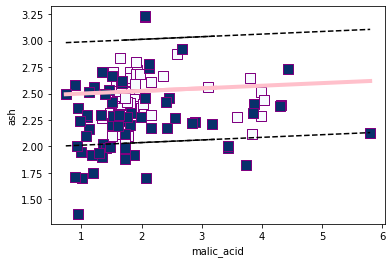

In [4]:
def plot_svm_decision_boundary(classifier, xmin, xmax):
    w = classifier.coef_[0]
    b = classifier.intercept_[0]
    # get function coefficients from the classifier  
    # generate x0 wrt to range of xmin and xmax 
    x0 = np.linspace(xmin, xmax, 200)
    # from wx+b =0, w0x0+w1x1+b=0 -> x1=-((w0/w1)x0 + b/w1)
    # compute decision boundary, that is x1
    x1 = -w[0]/w[1] * x0 - b/w[1]
    # compute margin
    margin_d = 1/w[1]
    # compute support vectors
    h1 = x1 + margin_d
    h2 = x1 - margin_d
    # plot support vectors
    plt.plot(x0, x1, linewidth=4, color='pink')
    plt.plot(x0, h2, 'k--')
    plt.plot(x0, h1, 'k--')
    # plot also decision boundary and margins 
    plt.xlabel("malic_acid") 
    plt.ylabel("ash")
plt.scatter(x = concat["malic_acid"], y=concat["ash"],c=y.values,s=100,cmap="Blues", edgecolors="purple", marker="s") 
plot_svm_decision_boundary(svm_concat, X_train.min(), X_train.max())
plt.scatter(svm_concat.support_vectors_[:,0], svm_concat.support_vectors_[:,1],linewidth=1,
            s=100, facecolors='none')
plt.show()


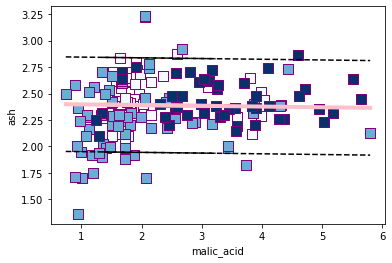

In [5]:
warnings.filterwarnings('ignore')
# generate 3 linear models (ax+b),with random a, b parameters
model1_x = con.iloc[:,0:2]
model1_y = con.iloc[:,2:3] 
  
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(model1_x, model1_y, test_size=0.30, random_state=0)
model1 = svm.SVC(kernel="linear")
model1.fit(X_train_m1,y_train_m1)
predict_model = model1.predict(X_test_m1)
# plot these decision boundaries on your 2d data 
plt.xlabel("malic_acid")
plt.ylabel("ash")
plt.scatter(x = model1_x["malic_acid"], y=model1_x["ash"],c=model1_y.values,s=100,cmap="Blues", edgecolors="purple", marker="s") 
plot_svm_decision_boundary(model1, model1_x.min(), model1_x.max())
plt.scatter(model1.support_vectors_[:, 0], model1.support_vectors_[:, 1],linewidth=1,
            s=100, facecolors='none')
plt.show()

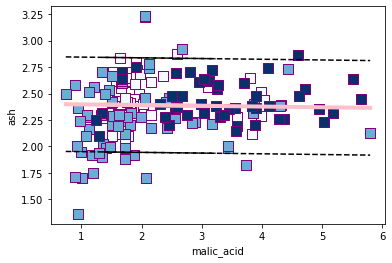

In [6]:
# call plot_svm_decision_boundary function for plotting decision boundary margings and suopprt vectors
#plot_svm_decision_boundary()
#plot also 2d data point for each class with different colored markers
plt.xlabel("malic_acid")
plt.ylabel("ash")
plt.scatter(x = model1_x["malic_acid"], y=model1_x["ash"],c=model1_y.values,s=100, cmap="Blues", edgecolors="purple", marker="s") 
plot_svm_decision_boundary(model1, model1_x.min(), model1_x.max())
plt.scatter(model1.support_vectors_[:, 0], model1.support_vectors_[:, 1],linewidth=1,
            s=100, facecolors='none')
plt.show()

Classify with Linear SVM on scaled and  also unscaled data, compare their decision boundaries using your plot_svm_decision_boundary function

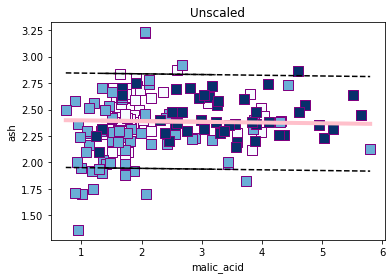

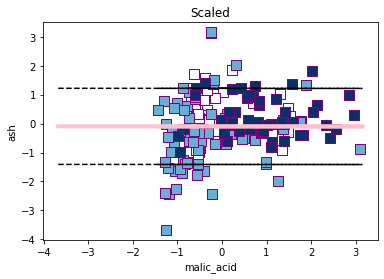

In [7]:
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.pipeline import make_pipeline
# svm classfier on unscaled data
# plot data points and decision boundaries
plt.title("Unscaled")
plt.xlabel("malic_acid")
plt.ylabel("ash")
plt.scatter(x = model1_x["malic_acid"], y=model1_x["ash"],c=model1_y.values,s=100,cmap="Blues", edgecolors="purple", marker="s") 
plot_svm_decision_boundary(model1, model1_x.min(), model1_x.max())
plt.scatter(model1.support_vectors_[:, 0], model1.support_vectors_[:, 1],linewidth=1,
            s=100, facecolors='none')
# to-do
plt.show()

# svm classfier on scaled data
scaled = scaler.fit_transform(model1_x.values)
scaled = pd.DataFrame(scaled,columns=["malic_acid","ash"])
X_train_m1, X_test_m1, y_train_m1, y_test_m1 = train_test_split(scaled, model1_y, test_size=0.30, random_state=0)
svm_scaled = svm.SVC(kernel="linear")
svm_scaled.fit(X_train_m1,y_train_m1)
# plot data points and decision boundaries
plt.xlabel("malic_acid")
plt.ylabel("ash")
plt.title("Scaled")
plt.scatter(x = scaled["malic_acid"], y=scaled["ash"],c=model1_y.values,s=100,cmap="Blues", edgecolors="purple", marker="s") 
plot_svm_decision_boundary(svm_scaled, scaled.min(), scaled.max())
plt.scatter(svm_scaled.support_vectors_[:, 0], svm_scaled.support_vectors_[:, 1],linewidth=1,
            s=100, facecolors='none')
# to-do
plt.show()

In [8]:
from sklearn.metrics import accuracy_score
# get a test score using unscaled SVM classifier
accuracy_score(y_test_m1,predict_model)

0.6851851851851852

Add 2 outliers, and analyze their effects on SVM classifier by comparing previous decision boundary.
Annotate thse outliers on your plots.

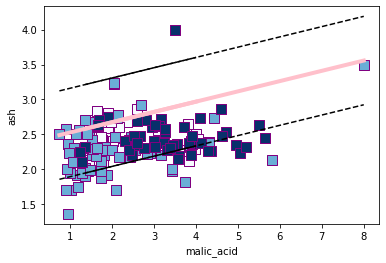

In [9]:
warnings.filterwarnings('ignore')
# add outliers to your data
outliers = con
outliers = outliers.append({"malic_acid":3.5,"ash":4,"Target":2},ignore_index=True)
outliers = outliers.append({"malic_acid":8,"ash":3.5,"Target":1},ignore_index=True)
outliers_x = outliers.iloc[:,0:2]
outliers_y = outliers.iloc[:,2:3]

# classify with SVM linear classifier
outliers_x_train,outliers_x_test,outliers_y_train,outliers_y_test = train_test_split(outliers_x,outliers_y,random_state=0,test_size=0.3)
# to-do
svm_outliers = svm.SVC(kernel="linear")
svm_outliers.fit(outliers_x_train,outliers_y_train)
# plot data (show also outliers and decision boundaries)  
plt.xlabel("malic_acid")
plt.ylabel("ash")
plt.scatter(x = outliers["malic_acid"], y=outliers["ash"],c=outliers_y.values,s=100,cmap="Blues", edgecolors="purple", marker="s",facecolors='none') 
plot_svm_decision_boundary(svm_outliers, outliers_x.min(), outliers_x.max())
plt.scatter(svm_outliers.support_vectors_[:, 0], svm_outliers.support_vectors_[:, 1],linewidth=1,
            s=100, facecolors='none')
# to-do
plt.show()

 #### **Part 2: NonLinear SVM**

Compare Linear and Kernel Multi-class SVMs

In [10]:
warnings.filterwarnings('ignore')
# get wine data instances for each class with same attributes (1 and 2)
concat_att = con[(con["Target"] == 1)|(con["Target"] == 2)] 
# split your new dataset as training and test set
att_x = concat_att.iloc[:,0:2]
att_y = concat_att.iloc[:,2:3]
# to-do
att_x_train,att_x_test,att_y_train,att_y_test = train_test_split(att_x,att_y,test_size=0.3,random_state=0)
# define Linear, RBF, Polynomial and Sigmoid) with following parameters: Regularizer=1, polynomail degree= at least 3, gaussian gamma=1
svm_linear = svm.SVC(kernel = "linear",C=1,gamma=1,degree=3)
svm_rbf = svm.SVC(kernel="rbf",C=1, gamma=1,degree=3) 
svm_polynomial = svm.SVC(kernel = "poly",degree= 3,C=1,gamma=1)
svm_sigmoid = svm.SVC(kernel="sigmoid", C=1, gamma=1)
# for multi-class SVM use one-versus-one approach
# to-do
svm_linear.fit(att_x_train,att_y_train)
svm_polynomial.fit(att_x_train,att_y_train)
svm_rbf.fit(att_x_train,att_y_train)
svm_sigmoid.fit(att_x_train,att_y_train)


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

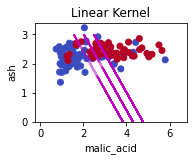

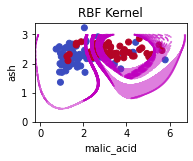

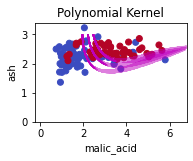

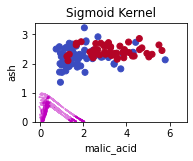

In [11]:
# plot each SVM classifiers decision boundaries (use subpplots)
def plot_decision_boundary(model, title):
  ax = plt.subplot(2, 2, 1)
  x_min, x_max = att_x.min() - 1, att_x.max() + 1
  y_min, y_max = att_y.min() - 1, att_y.max() + 1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
  xy = np.vstack([xx.ravel(), yy.ravel()]).T
    
  P = model.decision_function(xy).reshape(xx.shape)
    
  ax.contour(xx, yy, P,colors = "m",
               levels=[-0.5,0,0.5], alpha=0.5,
               linestyles=['--', '-', '--'])
# Plot also the training points
  plt.scatter(x = concat_att["malic_acid"],y = concat_att["ash"], c=att_y.values, cmap=plt.cm.coolwarm)
  plt.xlabel('malic_acid')
  plt.ylabel('ash')
  plt.title(title)
  plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, lw=1,  facecolors='none',marker="s") 
# add the titles for each plots
titles = ['Linear Kernel',
          'RBF Kernel',
          'Polynomial Kernel',
          "Sigmoid Kernel"]
# to-do
for i,clf in enumerate((svm_linear,svm_rbf,svm_polynomial,svm_sigmoid)):
  plot_decision_boundary(clf,titles[i])

  plt.show()

In [12]:
#compare prediction results of each classifier based on accuries (print them)
linear_prediction = svm_linear.predict(att_x_test)
polynomial_prediction = svm_polynomial.predict(att_x_test)
rbf_prediction = svm_rbf.predict(att_x_test)
sigmoid_prediction = svm_sigmoid.predict(att_x_test)
# to-do
print("Linear Accuracy ", accuracy_score(att_y_test,linear_prediction))
print("Polynomial Accuracy", accuracy_score(att_y_test,polynomial_prediction))
print("RBF Accuracy", accuracy_score(att_y_test,rbf_prediction))
print("Sigmoid Accuracy", accuracy_score(att_y_test,sigmoid_prediction))

Linear Accuracy  0.75
Polynomial Accuracy 0.7777777777777778
RBF Accuracy 0.75
Sigmoid Accuracy 0.6388888888888888


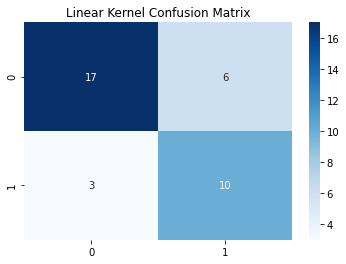

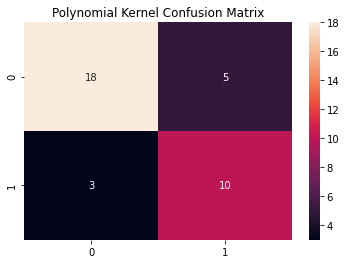

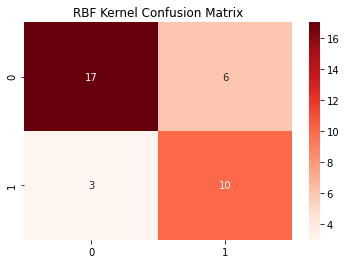

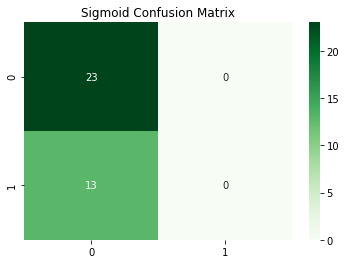

In [13]:
from sklearn.metrics import confusion_matrix
#compare confusion matrices
import seaborn as sns
linear_confusion = confusion_matrix(att_y_test,linear_prediction)
plt.title("Linear Kernel Confusion Matrix")
sns.heatmap(linear_confusion, annot=True, cmap="Blues")
plt.show()

polynomial_confusion = confusion_matrix(att_y_test,polynomial_prediction)
plt.title("Polynomial Kernel Confusion Matrix")
sns.heatmap(polynomial_confusion, annot=True)
plt.show()

rbf_confusion = confusion_matrix(att_y_test,rbf_prediction)
plt.title("RBF Kernel Confusion Matrix")
sns.heatmap(rbf_confusion, annot=True, cmap="Reds")
plt.show()

sigmoid_confusion = confusion_matrix(att_y_test,sigmoid_prediction)
plt.title("Sigmoid Confusion Matrix")
sns.heatmap(sigmoid_confusion, annot=True, cmap="Greens")
#to-do
plt.show()

#### **Part 3: MLP**

Constructing and training a 3 layered neural network using Pytorch library for digit classification (MNIST)

In [14]:
# required libraries and modules
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.utils
import time

In [15]:
# set device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [16]:
warnings.filterwarnings('ignore')
# download MNIST train and test sets using pytorch datasets module 
train_data = torchvision.datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test_data = torchvision.datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


In [17]:
# lets look train_data structure
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: 
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

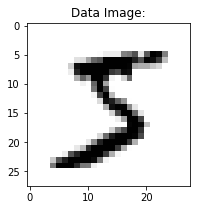



Image CxHxW : (1, 28, 28)


In [18]:
# define a display function for sample images using matplotlib
def display_sampledata(img):
    img = np.asarray(img)
    # convert to numpy array ((C)hannelx(H)eightx(W)idth -> HxWxC )
    img_shape = (np.squeeze(img,axis=0))
    # plot image using matplotlib
    plt.figure(figsize = (3,3))
    plt.title("Data Image:") 
    plt.imshow(img_shape, cmap = plt.cm.binary)
    # TO-DO
    plt.show()
    print("Image CxHxW :",(img.shape)) 
 
display_sampledata(train_data[0][0]) 

In [19]:
# define a function for displaying the number of parameters
def get_netparams(net):
  params = list(net.parameters())
  x = 0
  for i in range(len(params)):
    for j in range(len(params[i].size())-1):
      x = x + params[i].size()[j]*params[i].size()[j+1] + params[i].size()[j+1] 
    print(x," parameters ")   

In [20]:
# define a function that returns minibatch error in range [0,1]
def get_error(predicted_y, y):
    # to-do 
    err = 0.0
    for i in range(len(predicted_y)):
      if predicted_y[i]!= y[i]:
        err = err+1
    err = err/len(predicted_y)
    return err


In [21]:
# define train and test data loaders
batch_size = 100
train_loader = torch.utils.data.DataLoader(train_data,batch_size=batch_size, shuffle=True, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_data,batch_size=batch_size, shuffle=True, num_workers =2)

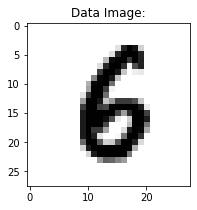

Image CxHxW : (1, 28, 28)


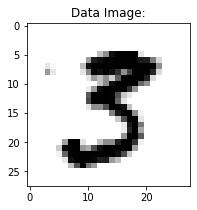

Image CxHxW : (1, 28, 28)


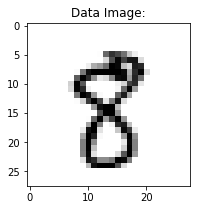

Image CxHxW : (1, 28, 28)


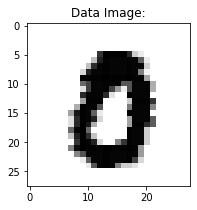

Image CxHxW : (1, 28, 28)


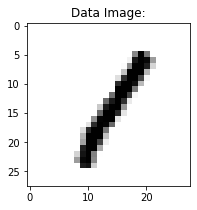

Image CxHxW : (1, 28, 28)


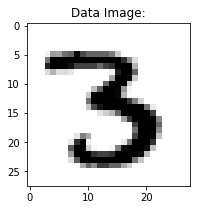

Image CxHxW : (1, 28, 28)


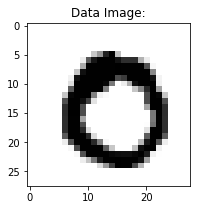

Image CxHxW : (1, 28, 28)


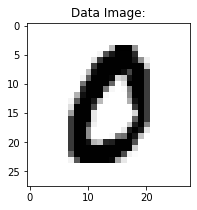

Image CxHxW : (1, 28, 28)


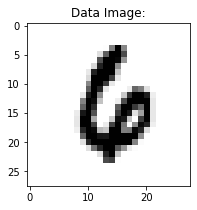

Image CxHxW : (1, 28, 28)


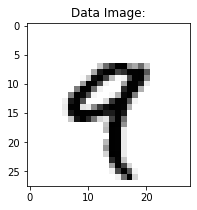

Image CxHxW : (1, 28, 28)


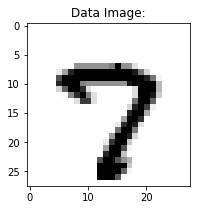

Image CxHxW : (1, 28, 28)


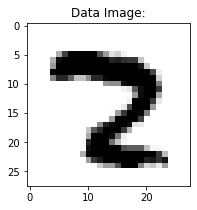

Image CxHxW : (1, 28, 28)


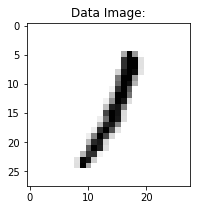

Image CxHxW : (1, 28, 28)


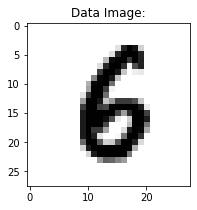

Image CxHxW : (1, 28, 28)


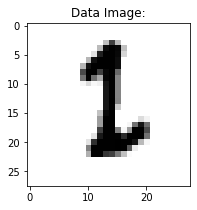

Image CxHxW : (1, 28, 28)


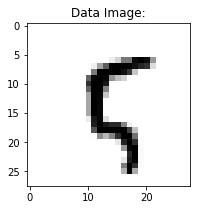

Image CxHxW : (1, 28, 28)


In [22]:
from random import randint 
# get some random 16 images
# to-do
for i in range(16):
  k = randint(0,100)
# show using your display_sampledata function
  display_sampledata(train_data[k][0])
# to-do


In [23]:
# Design a 3 layered  MLP network
class basicMLP(nn.Module):
  def __init__(self, input_size, num_hidden_neurons, num_classes):
    super(basicMLP,self).__init__()
    self.fc1 = nn.Linear(input_size,num_hidden_neurons[0]).to(device)
    self.fc2 = nn.Linear(num_hidden_neurons[0],num_hidden_neurons[1])
    self.fc3 = nn.Linear(num_hidden_neurons[1],num_classes).to(device)
    self.relu = nn.ReLU()
    # define layers
    # to-do
  
  def forward(self,input):    
    # define forward pass of your NN 
    x = nn.functional.relu(self.fc1(input))
    x = nn.functional.relu(self.fc2(x))
    x = self.fc3(x)
    # TO-DO
    return x

In [24]:
# create a 3 layered Neural Network instance for given parameters
# input size = image size * image size (get from your data shape)
input_size = 28*28
# number of hidden neurons: 200 and 300
hidden_nuerons = [200,300]
# number of classes: get from your data 
num_classes = 10
net = basicMLP(input_size,hidden_nuerons, num_classes)
net.to(device)
print(net)
get_netparams(net)

basicMLP(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=300, bias=True)
  (fc3): Linear(in_features=300, out_features=10, bias=True)
  (relu): ReLU()
)
157584  parameters 
157584  parameters 
217784  parameters 
217784  parameters 
221084  parameters 
221084  parameters 


In [25]:
import math
# define cross entropy as loss function
def loss_function(predict,y_test):
  loss = nn.CrossEntropyLoss()
  x = loss(predict,y_test)
  return x
# to-do
# setup the SGD optimizer with learning rate=1.e-2  (also try Adam optimizer later)
import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr = 1e-2,momentum = 0.9)
# to-do

In [26]:
# Train your model over 5 epochs (you can also try longer training)
n_epochs = 7

#  define lists/variables for tracking of the loss, error and the number of batches
train_loss = []
train_error = []
train_accuracy = []
train_counter = []

iter = 0
start = time.time()

for epoch in range(n_epochs):
  
  for i ,(images,labels) in enumerate(train_loader):
    iter += 1
    # get data and target as minibatch (also assign to device)
    data, target = images.to(device), labels.to(device)
    # reset the gradient
    optimizer.zero_grad()
    # a forward pass on your network
    output = net.forward(data.view(-1,784))
    # compute the loss 
    loss = loss_function(output,target)
    # a backward pass, back propagation
    loss.backward()
    # update the network parameters
    optimizer.step()
    # get the minibatch error using your get_error function
    _,predicted = torch.max(output,1)
    error = get_error(predicted,target)
    # keep loss, error for each iteration
    train_loss.append(loss.item())
    train_error.append(error)
    train_accuracy.append(1-error)
    train_counter.append(iter)
    batch_size = 20
    if (i+1) % 20 == 0:
      print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f Error: %.4f'%(epoch+1, n_epochs, i+1, len(train_data)//batch_size, loss.item(), error))
    if (i+1) % 1000 == 0:
      torch.save(net, "MLPtrain.pth")
    # save your model

elapsed_time = time.time() - start
print("Elapsed time: ",elapsed_time)

Epoch [1/7], Step [20/3000], Loss: 2.2734 Error: 0.6400
Epoch [1/7], Step [40/3000], Loss: 2.1937 Error: 0.5200
Epoch [1/7], Step [60/3000], Loss: 1.9019 Error: 0.3200
Epoch [1/7], Step [80/3000], Loss: 1.4106 Error: 0.2300
Epoch [1/7], Step [100/3000], Loss: 1.0622 Error: 0.2800
Epoch [1/7], Step [120/3000], Loss: 0.5809 Error: 0.1200
Epoch [1/7], Step [140/3000], Loss: 0.6100 Error: 0.1600
Epoch [1/7], Step [160/3000], Loss: 0.6085 Error: 0.1900
Epoch [1/7], Step [180/3000], Loss: 0.5572 Error: 0.1600
Epoch [1/7], Step [200/3000], Loss: 0.4008 Error: 0.1100
Epoch [1/7], Step [220/3000], Loss: 0.5326 Error: 0.1600
Epoch [1/7], Step [240/3000], Loss: 0.4571 Error: 0.1500
Epoch [1/7], Step [260/3000], Loss: 0.4506 Error: 0.1100
Epoch [1/7], Step [280/3000], Loss: 0.2941 Error: 0.0700
Epoch [1/7], Step [300/3000], Loss: 0.4592 Error: 0.1000
Epoch [1/7], Step [320/3000], Loss: 0.4730 Error: 0.1400
Epoch [1/7], Step [340/3000], Loss: 0.4011 Error: 0.1100
Epoch [1/7], Step [360/3000], Loss:

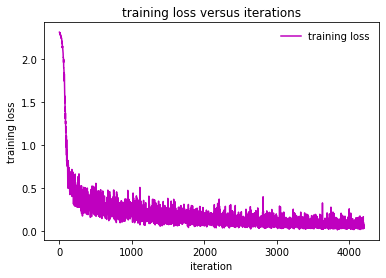

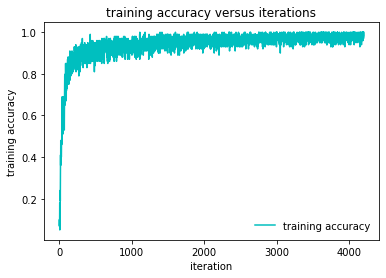

In [27]:
#display training loss versus iterations plot
plt.title("training loss versus iterations")
plt.xlabel("iteration")
plt.ylabel("training loss")
plt.plot(train_loss,label = "training loss", color='m')
plt.legend(frameon=False)
# to-do
plt.show()
# display training accuracy versus iterations plot
plt.title("training accuracy versus iterations")
plt.xlabel("iteration")
plt.ylabel("training accuracy")
plt.plot(train_accuracy,label = "training accuracy", color='c')
plt.legend(frameon=False)
# to-do
plt.show()

In [28]:
#evaluate your NN model on test data
# variables for total test error
pred_correct = 0
pred_total = 0
pred_test = []
test_errors = []
test_losses = []
pred_wrong = []
test_error=0

with torch.no_grad():
  for images,labels in test_loader:
    # get test data and target 
    test_data, y_test = images.to(device), labels.to(device)
    # forward pass
    output = net.forward(test_data.view(-1,784))
    # get test loss
    test_loss = loss_function(output,y_test)

    _,y_predicted = torch.max(output,1)
    idxs = (y_predicted != y_test)
    # compute error
    test_error = get_error(y_predicted,y_test) 
    test_errors.append(test_error)
    # compute test error and print it
  print("The error on test set: ", sum(test_errors)/len(y_predicted))

The error on test set:  0.027699999999999992


Prediction:  1


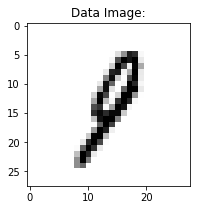

Image CxHxW : (1, 28, 28)
Data Label:  9


Prediction:  1


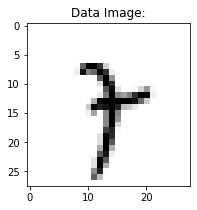

Image CxHxW : (1, 28, 28)
Data Label:  7


Prediction:  9


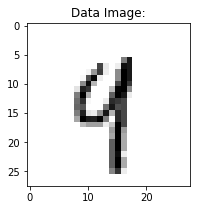

Image CxHxW : (1, 28, 28)
Data Label:  4


Prediction:  0


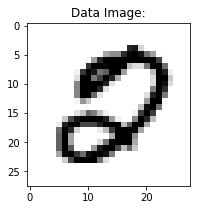

Image CxHxW : (1, 28, 28)
Data Label:  2


Prediction:  6


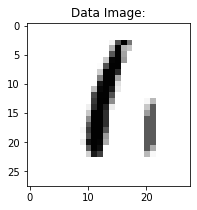

Image CxHxW : (1, 28, 28)
Data Label:  1


Prediction:  6


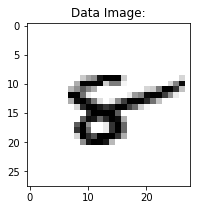

Image CxHxW : (1, 28, 28)
Data Label:  8




In [29]:
# display 8 incorrect classified test samples with predicted labels using your display_sampledata function 
# to-do
for i in range(len(idxs)):
  if idxs[i]:
    k = y_predicted[i]
    print("Prediction: ",k.item())
    display_sampledata(test_data[i].cpu())
    print("Data Label: ", y_test[i].item())
    print("\n")